# Procedural Animation

Kevin Walchko

---

## References

- youtube: [Giving Personality to Procedural Animations using Math](https://www.youtube.com/watch?v=KPoeNZZ6H4s)
- wiki: [Semi-implicit Euler method](https://en.wikipedia.org/wiki/Semi-implicit_Euler_method)

$$
y + k_1 \dot y + k_2 \ddot y = x + k_3 \dot x \\
y + \frac {\zeta}{\pi f} \dot y + \frac {1}{(2 \pi f)^2} \ddot y = x + \frac {r \zeta} {2 \pi f} \dot x
$$

| Parameter | Units | Description |
|-----------|-------|-------------|
| $f$       | Hz    | frequency |
| $\zeta$   |       | dampening ratio |
| $r$       |       | initial response of system |

```c
y[n+1] = y[n] + T * yd[n]
yd[n+1] = yd[n] + T*ydd[n]
```

Substitude in for ydd[n]:

```c
yd[n+1] = yd[n] + T (x[n+1] + k3*xd[n+1] - y[n+1]-k1*yd[n])/k2
```

Now substitute in for y[n+1] from the first equation:

```c
y[n+1] = y[n] + T*yd[n]
yd[n+1] = yd[n] + T (x[n+1] + k3*xd[n+1] - (y[n] + T*yd[n]) - k1*yd[n])/k2
```

You can collect terms and put it into a state space form:

$$
\begin{bmatrix} 
    y \\ 
    \dot y 
\end{bmatrix}^{n+1} = 
\begin{bmatrix}
    1 && T \\
    \frac{-T}{k_2} && \frac{k_2 - T^2-Tk_1}{k_2}
\end{bmatrix} 
\begin{bmatrix} 
    y \\ 
    \dot y 
\end{bmatrix}^{n} +
\begin{bmatrix}
    0 && 0 \\
    \frac{T}{k_2} && \frac{Tk_3}{k_2}
\end{bmatrix} 
\begin{bmatrix} 
    x \\ 
    \dot x 
\end{bmatrix}^{n+1}
$$

In [3]:
import numpy as np
from matplotlib import pyplot as plt

In [75]:
class SecondOrderDynamics:
    
    def __init__(self, f,z,r,x0,yd=0):
        self.k1 = z / (np.pi * f)
        self.k2 = 1 / (2 * np.pi * f)**2
        self.k3 = r * z / (2 * np.pi * f)
        self.xp = x0
        self.y = x0
        self.yd = yd
        
    def update(self,T, x):
        xd = (x - self.xp) / T
        self.xp = x
        k2stable = max(self.k2, 1.1*(T*T/4 + T*self.k1/2))
        k2 = k2stable
        k2 = self.k2
        self.y += T*self.yd
        self.yd += T*(x + self.k3*xd - self.y - self.k1*self.yd) / k2

In [78]:
def step(x, value, number):
    for i in range(number):
        x.append(value)
    return x

def linear(x, slope, number):
    v = x[-1]
    for i in range(number):
        v += slope
        x.append(v)
    return x

x = []
x = step(x,0,20)
x = step(x,2,50)
x = step(x,-1,40)
x = step(x,0,50)
x = linear(x,.1,20)
x = step(x,2,50)
x = linear(x,-.1,30)

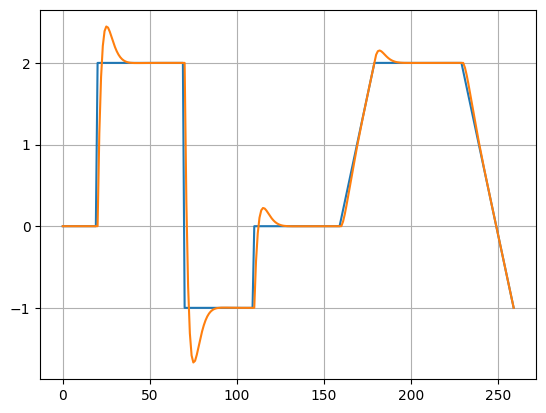

In [79]:
x0 = 0
f = .5
z = .75
r = 2
sod = SecondOrderDynamics(f,z,r,x0)

y = []
yd = []

for i in x:
    sod.update(.1, i)
    y.append(sod.y)
    yd.append(sod.yd)
    
plt.plot(x)
plt.plot(y)
plt.grid(True)

In [62]:
max(3,2)

3